In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from random import randrange, uniform

In [2]:
os.chdir("D:\Python\santander-customer transaction prediction")

In [3]:
os.getcwd()

'D:\\Python\\santander-customer transaction prediction'

In [4]:
test = pd.read_csv('test.csv')

In [5]:
test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [6]:
test.shape

(200000, 201)

In [7]:
train = pd.read_csv("train.csv")

In [8]:
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [9]:
train.shape

(200000, 202)

In [10]:
train.dtypes

ID_code     object
target       int64
var_0      float64
var_1      float64
var_2      float64
            ...   
var_195    float64
var_196    float64
var_197    float64
var_198    float64
var_199    float64
Length: 202, dtype: object

In [11]:
test.dtypes

ID_code     object
var_0      float64
var_1      float64
var_2      float64
var_3      float64
            ...   
var_195    float64
var_196    float64
var_197    float64
var_198    float64
var_199    float64
Length: 201, dtype: object

In [21]:
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,175073.000000,175073.000000,175073.000000,175073.000000,175073.000000,175073.000000,175073.000000,175073.000000,175073.000000,175073.000000,...,175073.000000,175073.000000,175073.000000,175073.000000,175073.000000,175073.000000,175073.000000,175073.000000,175073.000000,175073.000000
mean,0.097691,10.680201,-1.635942,10.711507,6.795677,11.078524,-5.071101,5.407802,16.545620,0.289605,...,3.238189,7.427826,1.924028,3.343734,17.993673,-0.141449,2.297313,8.908086,15.876076,-3.326583
std,0.296897,3.031999,4.048808,2.635507,2.042796,1.620351,7.867062,0.864390,3.417344,3.331695,...,4.539034,3.015767,1.455468,3.952981,3.134064,1.425334,5.453998,0.921239,3.003489,10.425672
min,0.000000,2.004400,-13.867400,3.035500,0.673200,6.318300,-29.188300,2.917000,6.465300,-9.991100,...,-9.748700,-1.358800,-2.192300,-7.833600,8.694400,-4.168600,-14.209600,6.245200,7.484500,-35.174900
25%,0.000000,8.455600,-4.751700,8.721800,5.250900,9.883200,-11.210100,4.767700,13.939200,-2.310500,...,-0.051700,5.152300,0.892000,0.602300,15.628700,-1.169400,-1.952300,8.252800,13.837500,-11.203300
50%,0.000000,10.529600,-1.616700,10.576800,6.823000,11.106500,-4.852000,5.383700,16.454600,0.405300,...,3.208600,7.334600,1.900700,3.395400,17.960800,-0.173800,2.403000,8.889300,15.942500,-2.835600
75%,0.000000,12.757100,1.345600,12.510400,8.324500,12.259300,0.925800,6.001700,19.107400,2.939800,...,6.394400,9.501500,2.943100,6.201500,20.396400,0.830400,6.549800,9.593300,18.070700,4.821900
max,1.000000,19.213500,10.376800,18.206700,12.924900,15.807100,17.251600,7.854100,26.760200,10.151300,...,16.079700,16.029500,6.039500,14.619800,27.528400,3.811800,18.321500,11.600100,24.413900,28.500700


In [22]:
test.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,7.569407,...,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231865,...,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,...,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.911900,-13.944200,6.169600,6.584000,-39.457800
25%,8.442975,-4.700125,8.735600,5.230500,9.891075,-11.201400,4.772600,13.933900,-2.303900,6.623800,...,-0.095000,5.166500,0.882975,0.587600,15.634775,-1.160700,-1.948600,8.260075,13.847275,-11.124000
50%,10.513800,-1.590500,10.560700,6.822350,11.099750,-4.834100,5.391600,16.422700,0.372000,7.632000,...,3.162400,7.379000,1.892600,3.428500,17.977600,-0.162000,2.403600,8.892800,15.943400,-2.725950
75%,12.739600,1.343400,12.495025,8.327600,12.253400,0.942575,6.005800,19.094550,2.930025,8.584825,...,6.336475,9.531100,2.956000,6.174200,20.391725,0.837900,6.519800,9.595900,18.045200,4.935400
max,22.323400,9.385100,18.714100,13.142000,16.037100,17.253700,8.302500,28.292800,9.665500,11.003600,...,20.359000,16.716500,8.005000,17.632600,27.947800,4.545400,15.920700,12.275800,26.538400,27.907400


In [23]:
#missing value 
missing_val = train.isnull().sum()

In [24]:
missing_val

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64

In [25]:
### Outlier Analysis####
%matplotlib inline
import seaborn as sns

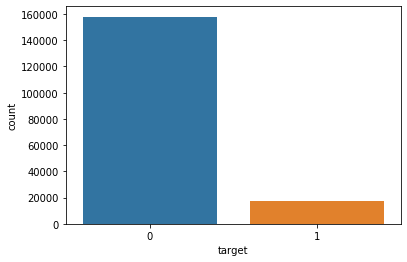

In [26]:
# to see the distribution of target variable
sns.countplot(x= 'target', data= train)

In [27]:
cnames = train.drop(['target', 'ID_code'], axis= 1)

In [29]:
cnames.columns

Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=200)

In [30]:
#Detect and delete outliers from data
for i in cnames:
    print (i)
   
    q75, q25 = np.percentile(train.loc[:,i], [75 ,25])
    iqr = q75 - q25

    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    print (minimum)
    print (maximum)
   
    
    train = train.drop(train[train.loc[:,i] < minimum].index)
    train = train.drop(train[train.loc[:,i] > maximum].index)

var_0
2.003350000000002
19.209349999999997
var_1
-13.897649999999999
10.491549999999998
var_2
3.038899999999999
18.1933
var_3
0.640299999999999
12.935100000000002
var_4
6.319225000000001
15.823424999999999
var_5
-29.413687499999998
19.129012499999998
var_6
2.9166999999999996
7.8527
var_7
6.187050000000001
26.859449999999995
var_8
-10.185950000000002
10.81525
var_9
3.6680250000000005
11.535824999999999
var_10
-15.5822
16.3574
var_11
-19.9868
13.3492
var_12
13.488850000000001
14.569249999999998
var_13
-5.7322
23.0934
var_14
0.5385499999999999
14.504550000000002
var_15
13.344249999999999
15.792649999999998
var_16
2.053349999999999
16.45935
var_17
-24.961100000000002
13.690100000000001
var_18
-8.581799999999994
38.75739999999999
var_19
-11.96355
36.67285
var_20
-5.2631
31.7537
var_21
-5.705399999999997
40.3618
var_22
-3.966799999999999
12.424199999999999
var_23
1.4792
4.558400000000001
var_24
-1.187899999999999
22.2849
var_25
12.84575
14.47415
var_26
-20.674599999999998
12.270999999999999


In [31]:
train['target'].value_counts()

0    157139
1     16974
Name: target, dtype: int64

In [32]:
train['target'].value_counts()*100/len(train)

0    90.251159
1     9.748841
Name: target, dtype: float64

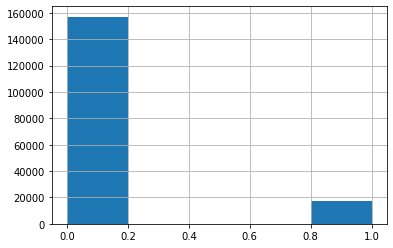

In [33]:
train['target'].hist(bins=5)

In [35]:
##### Feature selection ######
#correlation matrix

corr=train.iloc[:,:25].corr()

corr1=train.iloc[:,174:].corr()

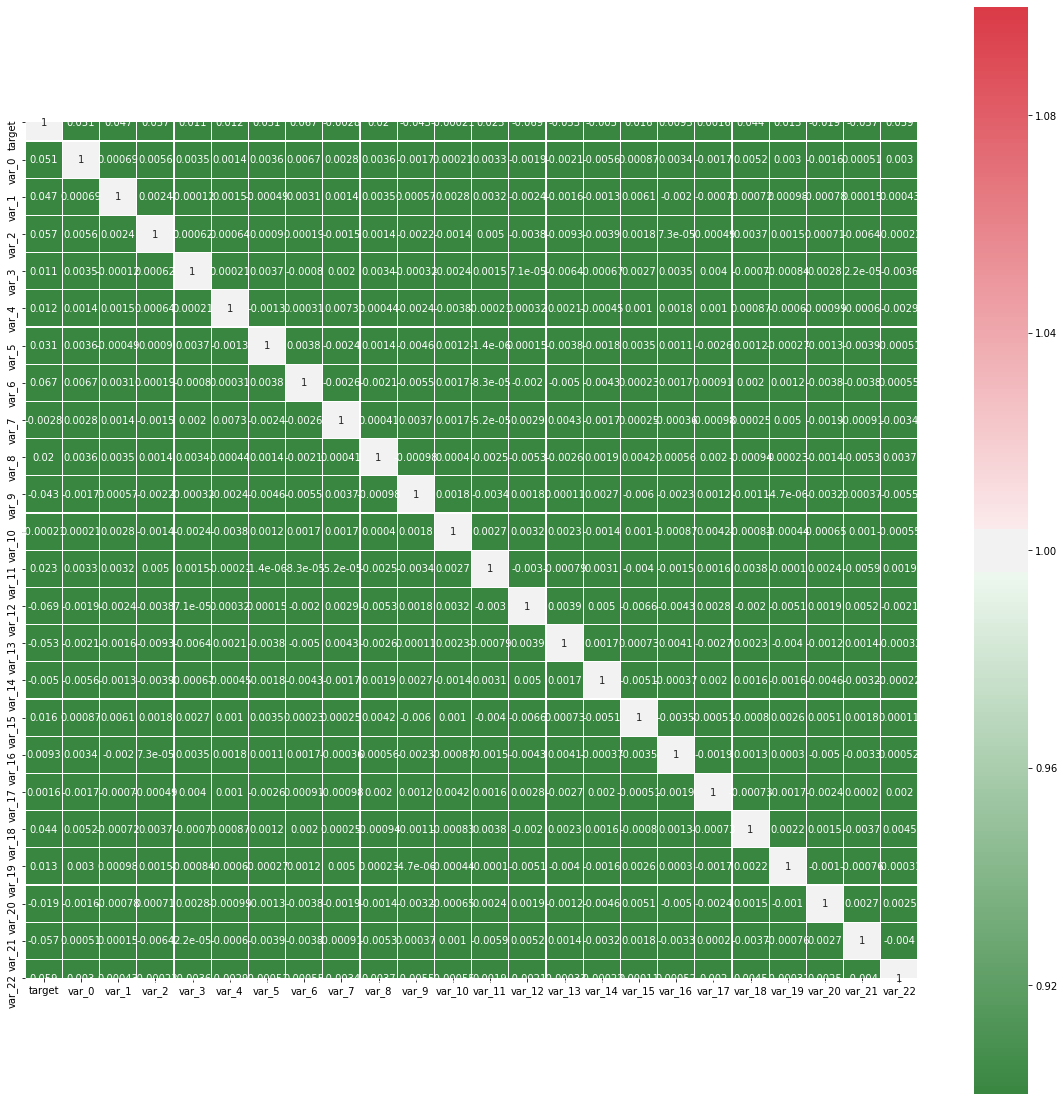

In [36]:
#Set the width and hieght of the p
fig, ax=plt.subplots(figsize=(20,20))

# plot the heatmap

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(130, 10, as_cmap=True),
            square=True, ax=ax, annot =True, vmin =1, linewidth = 0.2)

In [37]:
#import sklearn

from sklearn import preprocessing

Distributions of first 25 columns


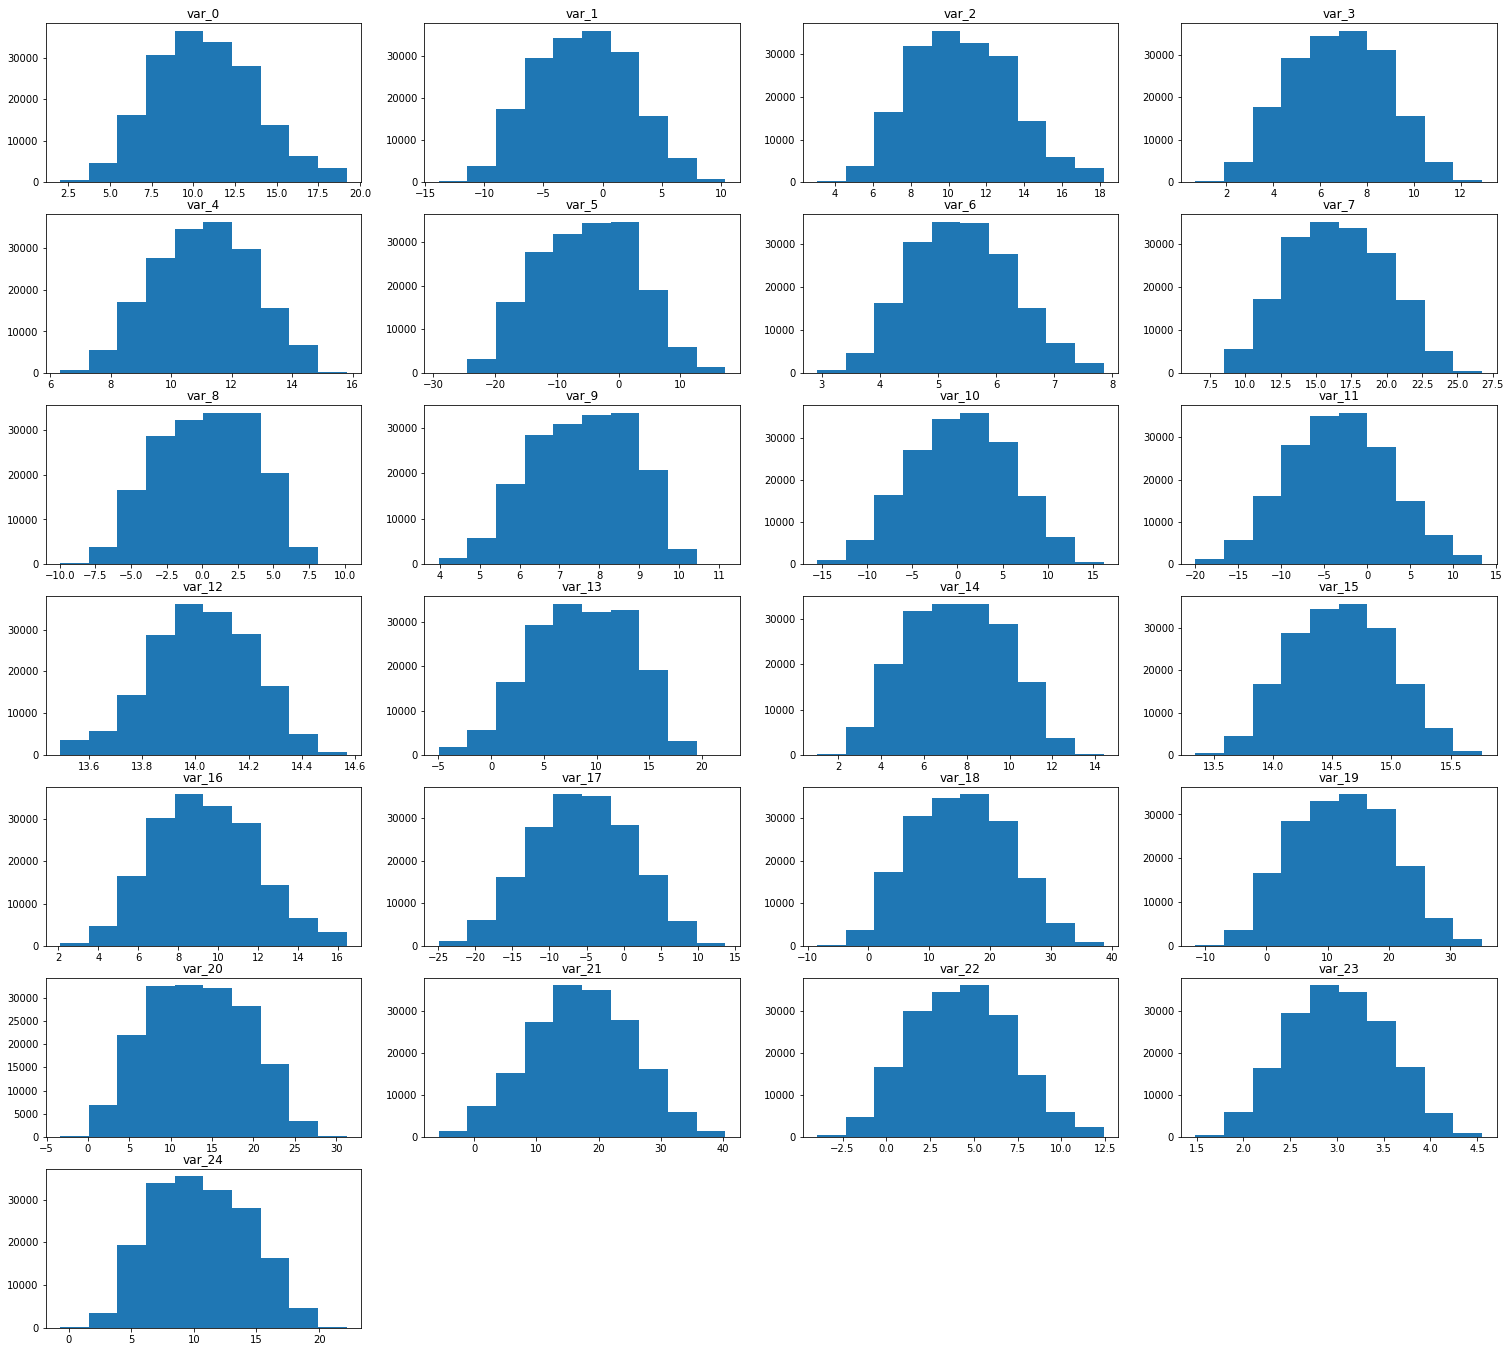

In [38]:
#let's check distribution of the data for first 25 columns

print('Distributions of first 25 columns')
plt.figure(figsize=(26, 24))
for i, col in enumerate(list(train.columns)[2:27]):
    plt.subplot(7, 4, i + 1)
    plt.hist(train[col])
    plt.title(col)

In [39]:
#Nomalisation
for i in cnames:
    print(i)
    train[i] = (train[i] - np.min(train[i]))/(np.max(train[i]) - np.min(train[i]))

var_0
var_1
var_2
var_3
var_4
var_5
var_6
var_7
var_8
var_9
var_10
var_11
var_12
var_13
var_14
var_15
var_16
var_17
var_18
var_19
var_20
var_21
var_22
var_23
var_24
var_25
var_26
var_27
var_28
var_29
var_30
var_31
var_32
var_33
var_34
var_35
var_36
var_37
var_38
var_39
var_40
var_41
var_42
var_43
var_44
var_45
var_46
var_47
var_48
var_49
var_50
var_51
var_52
var_53
var_54
var_55
var_56
var_57
var_58
var_59
var_60
var_61
var_62
var_63
var_64
var_65
var_66
var_67
var_68
var_69
var_70
var_71
var_72
var_73
var_74
var_75
var_76
var_77
var_78
var_79
var_80
var_81
var_82
var_83
var_84
var_85
var_86
var_87
var_88
var_89
var_90
var_91
var_92
var_93
var_94
var_95
var_96
var_97
var_98
var_99
var_100
var_101
var_102
var_103
var_104
var_105
var_106
var_107
var_108
var_109
var_110
var_111
var_112
var_113
var_114
var_115
var_116
var_117
var_118
var_119
var_120
var_121
var_122
var_123
var_124
var_125
var_126
var_127
var_128
var_129
var_130
var_131
var_132
var_133
var_134
var_135
var_136
var_137
var_13

In [40]:
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,0.402340,0.292074,0.585158,0.360750,0.541770,0.428616,0.446167,0.599229,...,0.548965,0.306252,0.648641,0.423920,0.521838,0.221894,0.678981,0.432931,0.312142,0.535268
2,train_2,0,0.383959,0.458737,0.596545,0.589273,0.449184,0.432917,0.815794,0.401589,...,0.489653,0.641461,0.469926,0.423688,0.685452,0.916032,0.236337,0.377654,0.426961,0.558635
3,train_3,0,0.526447,0.483233,0.389936,0.532375,0.660260,0.588981,0.592903,0.416839,...,0.550174,0.351077,0.353797,0.411871,0.761405,0.363140,0.346810,0.755756,0.618975,0.411073
4,train_4,0,0.455322,0.510803,0.648991,0.486814,0.627852,0.681244,0.612702,0.630015,...,0.319199,0.625979,0.247909,0.759256,0.243878,0.332878,0.557507,0.608396,0.620613,0.414044
5,train_5,0,0.550625,0.476370,0.631383,0.649151,0.489204,0.705195,0.327315,0.431645,...,0.132457,0.458044,0.911325,0.368024,0.331889,0.651596,0.325396,0.657678,0.300352,0.477651


In [41]:
###### Model Development#######
#import libraries

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [42]:
minority_class_len = len(train[train['target']== 1])

In [43]:
minority_class_len

16974

In [44]:
majority_class_indices = train[train['target']==0].index
print(len(majority_class_indices))
print(majority_class_indices)

157139
Int64Index([     0,      2,      3,      4,      5,      6,      7,      8,
                 9,     10,
            ...
            199985, 199988, 199989, 199991, 199992, 199993, 199994, 199995,
            199997, 199999],
           dtype='int64', length=157139)


In [45]:
random_majority_indices = np.random.choice(majority_class_indices, minority_class_len, replace = False)

print(random_majority_indices)

[118419  60347 122532 ... 166650 125298  92339]


In [46]:
minority_class_indices = train[train['target']==1].index
print(minority_class_indices)

Int64Index([    13,     29,     63,     65,     72,     84,     99,    119,
               120,    130,
            ...
            199833, 199849, 199855, 199869, 199877, 199892, 199923, 199976,
            199981, 199990],
           dtype='int64', length=16974)


In [47]:
under_sample_indices = np.concatenate([minority_class_indices, random_majority_indices])

In [48]:
train = train.loc[under_sample_indices]

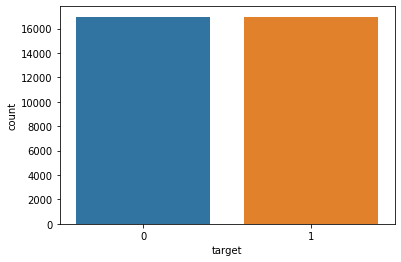

In [49]:
sns.countplot(x= 'target', data= train)

In [50]:
#replace target variables values with yes or no

train['target'] = train['target'].replace(0, 'No')
train['target'] = train['target'].replace(1, 'Yes')

In [51]:
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
13,train_13,Yes,0.835102,0.637711,0.904248,0.543582,0.613914,0.755572,0.386082,0.714840,...,0.663919,0.504105,0.802548,0.531486,0.460306,0.359180,0.734503,0.522269,0.479241,0.381967
29,train_29,Yes,0.193331,0.464482,0.669907,0.199654,0.034412,0.487133,0.605792,0.432069,...,0.606585,0.536583,0.551615,0.399661,0.771074,0.270425,0.552382,0.598723,0.585911,0.321712
63,train_63,Yes,0.331518,0.572743,0.458966,0.626786,0.312771,0.340776,0.633372,0.179626,...,0.438376,0.366070,0.739461,0.680146,0.679091,0.418388,0.343142,0.249080,0.488825,0.638420
65,train_65,Yes,0.495951,0.467060,0.375882,0.496388,0.852697,0.545133,0.454212,0.461830,...,0.557859,0.447699,0.681080,0.165634,0.287937,0.491379,0.602325,0.457469,0.451309,0.612790
72,train_72,Yes,0.386151,0.590393,0.523915,0.776439,0.800215,0.273984,0.479604,0.363357,...,0.632908,0.831691,0.539815,0.376323,0.783838,0.561413,0.687742,0.313657,0.180047,0.271754


In [52]:
#divide the dataset in test and train data

X = train.drop(['ID_code', 'target'], axis=1)
Y = train['target']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

In [53]:
#decision tree

from sklearn import tree

C50_model = tree.DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)

#test scores

C50_predictions = C50_model.predict(X_test)

In [54]:
#confusion matrix

Confusion_matrix = CM = pd.crosstab(y_test, C50_predictions)

#let check for belw values
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

In [55]:
Confusion_matrix

col_0,No,Yes
target,,
No,3045,2026
Yes,2119,2995


In [56]:
#Accurary for the model decision tree
Accuracy = ((TP+TN)*100)/(TP+TN+FP+FN)

In [57]:
Accuracy

59.30289641629848

In [58]:
#False Negative rate for the model decision tree
FNR = (FN*100)/(FN+TP)

In [59]:
FNR

41.43527571372702

In [60]:
#recall for the model decision tree 
print('Recall: ', TP/(TP+FN))

#precision for the model decision tree
print('Precision:', TP/(TP+FP) )

Recall:  0.5856472428627297
Precision: 0.596494722166899


In [61]:
# random forest

from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators = 100).fit(X_train, y_train)

In [62]:
Prediction = RF.predict(X_test)

In [63]:
#confusion matrix
Confusion_matrix = CM = pd.crosstab(y_test, Prediction)

#lets check the below values
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

In [64]:
Confusion_matrix

col_0,No,Yes
target,,
No,3815,1256
Yes,1294,3820


In [65]:
#Accurary for the model random forest(N=100)
print('Accuracy: ', ((TP+TN)*100)/(TP+TN+FP+FN))

#false negative rate for the model random forest(N=100)
print('FNR:', (FN*100)/(FN+TP))

Accuracy:  74.96318114874816
FNR: 25.30308955807587


In [66]:
#recall for the model random forest(N=100)
print('Recall: ', TP/(TP+FN))

#precision for the model random forest(N=100)
print('Precision:', TP/(TP+FP))

Recall:  0.7469691044192412
Precision: 0.7525610717100079


In [67]:
from sklearn import metrics

print('Accuracy:', metrics.accuracy_score(y_test, Prediction)*100)

Accuracy: 74.96318114874816


In [68]:
#KNN

from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)

In [89]:
Predict = KNN.predict(X_test)


In [90]:
Confusion_matrix = CM = pd.crosstab(y_test, Predict)

Confusion_matrix

col_0,No,Yes
target,,
0,4973,155
1,3815,1242


In [91]:
#let us save TP, TN, FP, FN

TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model

((TP+TN)*100)/(TP+TN+FP+FN)

61.021109474717726

In [92]:
#False Negative rate 
(FN*100)/(FN+TP)

75.43998418034408

In [93]:
#recall 
print('Recall: ', TP/(TP+FN))

#precision
print('Precision:', TP/(TP+FP) )

Recall:  0.24560015819655923
Precision: 0.8890479599141017


In [94]:

#replace target variables values with 1 or 0

train['target'] = train['target'].replace('No',0)
train['target'] = train['target'].replace('Yes',1)
train.head(5)

#divide the dataset in test and train data

X = train.drop(['ID_code', 'target'], axis=1)
Y = train['target']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)


In [95]:
# logistic regression

from sklearn.linear_model import LogisticRegression

#instantiate the model

logreg = LogisticRegression()

logreg.fit(X_train, y_train)





C:\Users\rahul\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [96]:
Pred = logreg.predict(X_test)

CM = pd.crosstab(y_test, Pred)


#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy

((TP+TN)*100)/(TP+TN+FP+FN)

78.34069710358371

In [97]:
#False negative

(FN*100)/(FN+TP)

21.268137547207314

In [98]:
#recall 
print('Recall: ', TP/(TP+FN))

#precision
print('Precision:', TP/(TP+FP) )

Recall:  0.7873186245279269
Precision: 0.7771237983127329


In [99]:
from sklearn.metrics import roc_curve, auc
probs = logreg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_aucc = metrics.auc(fpr, tpr)

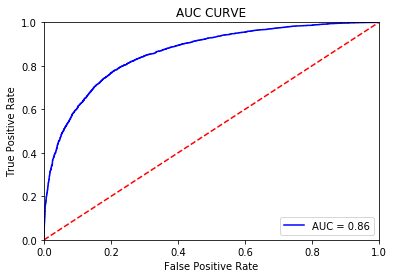

In [100]:
plt.title('AUC CURVE')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_aucc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [101]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB

#implementation

Navbay = GaussianNB().fit(X_train, y_train)

In [102]:
PredictNB = Navbay.predict(X_test)

In [103]:
CM = pd.crosstab(y_test, PredictNB)


#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy

((TP+TN)*100)/(TP+TN+FP+FN)

80.58910162002945

In [104]:
#False negative

(FN*100)/(FN+TP)

19.161200556549392

In [105]:
#recall 
print('Recall: ', TP/(TP+FN))

#precision
print('Precision:', TP/(TP+FP) )

Recall:  0.808387994434506
Precision: 0.8005905511811023


In [106]:

probs = Navbay.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

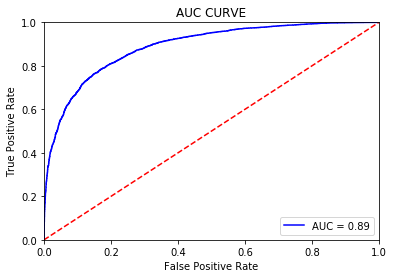

In [107]:
plt.title('AUC CURVE')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [108]:
test.head(5)

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [ ]:
PredictNB = Navbay.predict(test)

In [ ]:
PredictNB

In [ ]:
test['target'] = Navbay.predict(test)

In [ ]:
test.head()

In [ ]:
test.to_csv("test2.csv")